# Temperature profiles (basics)
This tutorial shows how to create and use temperature-pressure profiles. Currently, there are three temperature models:

1. [Isothermal Profiles](#isothermal-profiles)
2. [Guillot Profiles](#guillot-profiles)
3. [Madhu Profiles](#madhu-profiles)

<div class="alert alert-info">

Note

You can also find this tutorial as a [jupyter notebook here](https://github.com/pcubillos/pyratbay/blob/ver2.0/docs/cookbooks/temperature_profiles.ipynb).

</div>

---

## Isothermal Profiles

The isothermal model has a single free parameter (``T_iso``), which sets a constant temperature at all layers.
Here is an example:

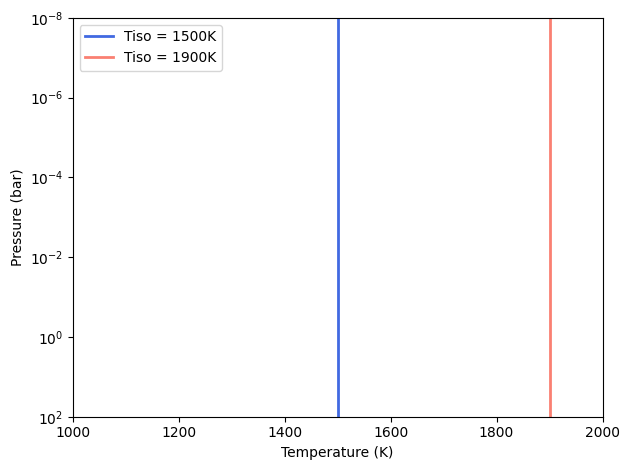

In [1]:
import pyratbay.atmosphere as pa
import matplotlib.pyplot as plt
import numpy as np


# To initialize an isothermal model, provide the pressure array (bars):
pressure = pa.pressure(ptop='1e-8 bar', pbottom='100 bar', nlayers=61)
tp_iso = pa.tmodels.Isothermal(pressure)

# Evaluate a couple of TP profile at a given tempperature:
temp_iso_1500K = tp_iso(1500.0)
temp_iso_1900K = tp_iso(1900.0)


# Plot the results:
plt.figure(10)
plt.clf()
ax = plt.subplot(111)
ax.plot(temp_iso_1500K, pressure, color='royalblue', lw=2.0, label='Tiso = 1500K')
ax.plot(temp_iso_1900K, pressure, color='salmon', lw=2.0, label='Tiso = 1900K')
ax.set_yscale('log')
ax.set_ylim(np.amax(pressure), np.amin(pressure))
ax.set_xlabel('Temperature (K)')
ax.set_ylabel('Pressure (bar)')
ax.set_xlim(1000, 2000)
ax.legend()
plt.tight_layout()

In [2]:
# This is some useful data contained in the object:
print(tp_iso)

Model name: isothermal
Number of parameters (npars): 1
Parameter names (pnames): ['T_iso']
Parameter Latex names (texnames): ['$T\\ ({\\rm K})$']
Pressure array (pressure, bar):
 [1.000e-08 1.468e-08 2.154e-08 3.162e-08 4.642e-08 6.813e-08 1.000e-07
 1.468e-07 2.154e-07 3.162e-07 4.642e-07 6.813e-07 1.000e-06 1.468e-06
 2.154e-06 3.162e-06 4.642e-06 6.813e-06 1.000e-05 1.468e-05 2.154e-05
 3.162e-05 4.642e-05 6.813e-05 1.000e-04 1.468e-04 2.154e-04 3.162e-04
 4.642e-04 6.813e-04 1.000e-03 1.468e-03 2.154e-03 3.162e-03 4.642e-03
 6.813e-03 1.000e-02 1.468e-02 2.154e-02 3.162e-02 4.642e-02 6.813e-02
 1.000e-01 1.468e-01 2.154e-01 3.162e-01 4.642e-01 6.813e-01 1.000e+00
 1.468e+00 2.154e+00 3.162e+00 4.642e+00 6.813e+00 1.000e+01 1.468e+01
 2.154e+01 3.162e+01 4.642e+01 6.813e+01 1.000e+02]
Last evaluated profile (temperature, K):
 [1900. 1900. 1900. 1900. 1900. 1900. 1900. 1900. 1900. 1900. 1900. 1900.
 1900. 1900. 1900. 1900. 1900. 1900. 1900. 1900. 1900. 1900. 1900. 1900.
 1900. 1900. 

---

## Guillot Profiles

The ``guillot`` model has six parameters as defined in [Line et al. (2013)](https://ui.adsabs.harvard.edu/abs/2013ApJ...775..137L):

 ``log_kappa'``, ``log_gamma1``, ``log_gamma2``, ``alpha``, ``T_irr``, and ``T_int``.
  
The temperature profile is defined as:

$$ T^4(p) = \frac{3 T_{\rm int}^{4}}{4} \left(\frac{2}{3} + \tau\right)
    + (1-\alpha) \frac{3 T_{\rm irr}^{4}}{4} \xi_1(\tau)
    +    \alpha  \frac{3 T_{\rm irr}^{4}}{4} \xi_2(\tau), $$
with
$$    \xi_i(\tau) = \frac{2}{3}
        + \frac{2}{3\gamma_i} \left[1 + \left(\frac{\gamma_i\tau}{2}-1\right)e^{-\gamma_i\tau}\right]
        + \frac{2\gamma_i}{3} \left(1-\frac{\tau^{2}}{2}\right)E_{2}(\gamma_i\tau), $$

where $E_{2}(\gamma_{i}\tau)$ is the second-order exponential
integral; $T_{\rm int}$ is the internal heat temperature; and $\tau(p)
= \kappa' p$ (note that this parameterization differs from that of
Line et al. (2013), which are related as $\kappa' \equiv \kappa/g$).  $T_{\rm irr}$ parametrizes the stellar irradiation absorbed by the planet as:

$$  T_{\rm irr} = \left(\frac{1-A}{f}\right)^{1/4}
                \left( \frac{R_{\rm s}}{2a}\right)^{1/2} T_{\rm s} $$

Here's a sample script:

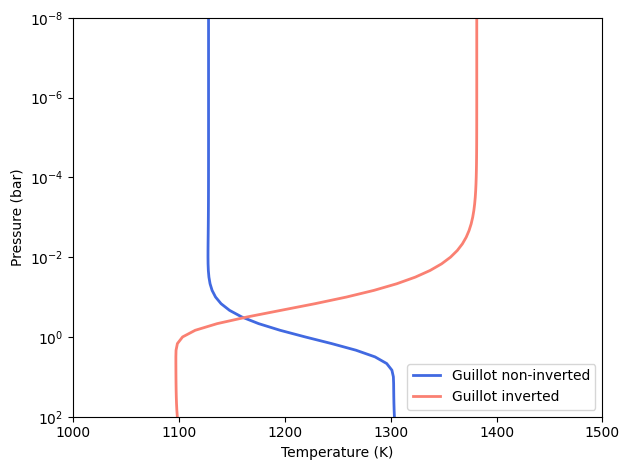

In [3]:
import pyratbay.atmosphere as pa
import matplotlib.pyplot as plt
import numpy as np


# To initialize a Guillot TP model, provide the pressure array (in bars):
pressure = pa.pressure(ptop='1e-8 bar', pbottom='100 bar', nlayers=61)
tp_guillot = pa.tmodels.Guillot(pressure)

# Evaluate a couple of Guillot profiles (non-inverted if log_gamma < 0):
# log_kappa', log_gamma1, log_gamma2, alpha, t_irr, t_int
params1 = -6.0, -0.25, 0.0, 0.0, 1200.0, 100.0
params2 = -6.0,  0.40, 0.0, 0.0, 1200.0, 100.0
temp_guillot1 = tp_guillot(params1)
temp_guillot2 = tp_guillot(params2)


# Plot the profiles:
plt.figure(20)
plt.clf()
ax = plt.subplot(111)
ax.plot(temp_guillot1, pressure, color='royalblue', lw=2.0, label='Guillot non-inverted')
ax.plot(temp_guillot2, pressure, color='salmon', lw=2.0, label='Guillot inverted')
ax.set_yscale('log')
ax.set_ylim(np.amax(pressure), np.amin(pressure))
ax.set_xlabel('Temperature (K)')
ax.set_ylabel('Pressure (bar)')
ax.set_xlim(1000, 1500)
ax.legend()
plt.tight_layout()

In [4]:
# This is some useful data contained in the object:
print(tp_guillot)

Model name: guillot
Number of parameters (npars): 6
Parameter names (pnames): ["log_kappa'", 'log_gamma1', 'log_gamma2', 'alpha', 'T_irr', 'T_int']
Parameter Latex names (texnames): ["$\\log\\ \\kappa'$", '$\\log\\ \\gamma_1$', '$\\log\\ \\gamma_2$', '$\\alpha$', '$T_{\\rm irr} (K)$', '$T_{\\rm int} (K)$']
Pressure array (pressure, bar):
 [1.000e-08 1.468e-08 2.154e-08 3.162e-08 4.642e-08 6.813e-08 1.000e-07
 1.468e-07 2.154e-07 3.162e-07 4.642e-07 6.813e-07 1.000e-06 1.468e-06
 2.154e-06 3.162e-06 4.642e-06 6.813e-06 1.000e-05 1.468e-05 2.154e-05
 3.162e-05 4.642e-05 6.813e-05 1.000e-04 1.468e-04 2.154e-04 3.162e-04
 4.642e-04 6.813e-04 1.000e-03 1.468e-03 2.154e-03 3.162e-03 4.642e-03
 6.813e-03 1.000e-02 1.468e-02 2.154e-02 3.162e-02 4.642e-02 6.813e-02
 1.000e-01 1.468e-01 2.154e-01 3.162e-01 4.642e-01 6.813e-01 1.000e+00
 1.468e+00 2.154e+00 3.162e+00 4.642e+00 6.813e+00 1.000e+01 1.468e+01
 2.154e+01 3.162e+01 4.642e+01 6.813e+01 1.000e+02]
Last evaluated profile (temperature, K)

Further reading for the Guillot TP model:

- [In-depth tutorial of how the free parameters modify the profile](./temperature_profiles_indepth.html)

- [Usage via configuration files](../atmosphere_modeling.html#id4)

---

## Madhu Profiles

The madhu model has six parameters as defined in [Madhusudhan & Seager (2009)](https://ui.adsabs.harvard.edu/abs/2009ApJ...707...24M):

 ``log_p1``, ``log_p2``, ``log_p3``, ``a1``, ``a2``, and ``T0``

where the pressure values must be given in log10(bar) units.  The temperature profile is then computed as a set to three layers given by:

$$ T(p) = \left\{
  \begin{array}{lll}
  T_0 + \left[\frac{1}{a_1}\ln(p/p_0)\right]^2 & \text{for } p < p_1
     & (\rm layer\ 1) \\
  T_2 + \left[\frac{1}{a_2}\ln(p/p_2)\right]^2 & \text{for } p_1 \le p < p_3
     & (\rm layer\ 2) \\
  T_3   & \text{for } p \ge p_3 & (\rm layer\ 3)
  \end{array} \right.
$$

A thermally inverted profile will result when $p_1 < p_2$;
a non-inverted profile will result when $p_2 < p_1$.


<div class="alert alert-warning">

Note

The pressure parameters must also satisfy: $p_1 < p_3$ (otherwise the model will return zeros). In a retrieval you can use this as a condition to reject a proposed sample.

</div>




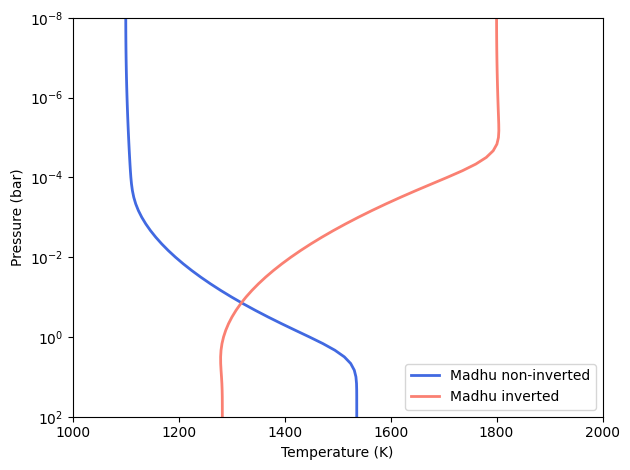

In [5]:
import pyratbay.atmosphere as pa
import matplotlib.pyplot as plt
import numpy as np


# To initialize a Madhu model, provide the pressure array (in bars):
pressure = pa.pressure(ptop='1e-8 bar', pbottom='100 bar', nlayers=61)
tp_madhu = pa.tmodels.Madhu(pressure)


# Evaluate a couple of Madhu TP profiles (non-inverted if p1 > p2):
#      log_p1, log_p2, log_p3, a1, a2, T0
params1 = -3.5, -4.0, 0.5, 3.0, 0.5, 1100.0
params2 = -4.5, 0.5, 1.0, 3.0, 0.5, 1800.0
temp_madhu1 = tp_madhu(params1)
temp_madhu2 = tp_madhu(params2)


# Plot the profile:
plt.figure(30)
plt.clf()
ax = plt.subplot(111)
ax.plot(temp_madhu1, pressure, color='royalblue', lw=2.0, label='Madhu non-inverted')
ax.plot(temp_madhu2, pressure, color='salmon', lw=2.0, label='Madhu inverted')
ax.set_yscale('log')
ax.set_ylim(np.amax(pressure), np.amin(pressure))
ax.set_xlabel('Temperature (K)')
ax.set_ylabel('Pressure (bar)')
ax.set_xlim(1000, 2000)
ax.legend()
plt.tight_layout()

In [6]:
# This is some useful data contained in the object:
print(tp_madhu)

Model name: madhu
Number of parameters (npars): 6
Parameter names (pnames): ['log_p1', 'log_p2', 'log_p3', 'a1', 'a2', 'T0']
Parameter Latex names (texnames): ['$\\log\\ p_1$', '$\\log\\ p_2$', '$\\log\\ p_3$', '$a_1$', '$a_2$', '$T_0$']
Pressure array (pressure, bar):
 [1.000e-08 1.468e-08 2.154e-08 3.162e-08 4.642e-08 6.813e-08 1.000e-07
 1.468e-07 2.154e-07 3.162e-07 4.642e-07 6.813e-07 1.000e-06 1.468e-06
 2.154e-06 3.162e-06 4.642e-06 6.813e-06 1.000e-05 1.468e-05 2.154e-05
 3.162e-05 4.642e-05 6.813e-05 1.000e-04 1.468e-04 2.154e-04 3.162e-04
 4.642e-04 6.813e-04 1.000e-03 1.468e-03 2.154e-03 3.162e-03 4.642e-03
 6.813e-03 1.000e-02 1.468e-02 2.154e-02 3.162e-02 4.642e-02 6.813e-02
 1.000e-01 1.468e-01 2.154e-01 3.162e-01 4.642e-01 6.813e-01 1.000e+00
 1.468e+00 2.154e+00 3.162e+00 4.642e+00 6.813e+00 1.000e+01 1.468e+01
 2.154e+01 3.162e+01 4.642e+01 6.813e+01 1.000e+02]
Last evaluated profile (temperature, K):
 [1800.0320672  1800.06719103 1800.12487823 1800.21001076 1800.32561

Further reading for the Madhu TP model:

- [In-depth tutorial of how the free parameters modify the profile](./temperature_profiles_indepth.html#understanding-madhu-parameters)

- [Usage via configuration files](../atmosphere_modeling.html#id4)